In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd


In [ ]:
data=pd.read_csv("/content/boston.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
corr = data.corr()
corr.shape

(14, 14)

In [ ]:
X =data.drop(['MEDV'], axis = 1)
y = data['MEDV']

In [ ]:
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
y.describe()


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the scaler and fit to training dataset, X_train
scaler = MinMaxScaler()
scaler.fit(X_train)
# Replace unscaled values with scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim =13, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(54, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1,activation = 'linear'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 28ms/step - loss: 591.8796 - mse: 591.8796 - mae: 22.5101 - val_loss: 538.2869 - val_mse: 538.2869 - val_mae: 21.3494
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 543.8799 - mse: 543.8799 - mae: 21.4515 - val_loss: 474.7592 - val_mse: 474.7592 - val_mae: 19.8041
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 457.4454 - mse: 457.4454 - mae: 19.1527 - val_loss: 355.9131 - val_mse: 355.9131 - val_mae: 16.5206
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 315.4877 - mse: 315.4877 - mae: 14.7537 - val_loss: 179.2419 - val_mse: 179.2419 - val_mae: 10.5306
Epoch 5/200
9/9 [==============================] - 0s 9ms/step - loss: 160.9572 - mse: 160.9572 - mae: 9.7824 - val_loss: 113.1771 - val_mse: 113.1771 - val_mae: 8.5704
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 150.6300 - mse: 150.6300 - mae: 9.4857 - val_loss: 97.4884 - val_mse: 97.48

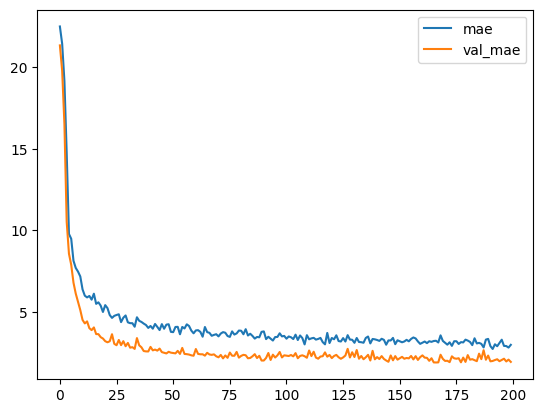

In [ ]:
import matplotlib.pyplot as plt
#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.legend()

In [ ]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  17.536407470703125
Mean Absolute Error :  2.760394334793091


In [ ]:
Y_pred = model.predict(X_test)
Y_pred


5/5 [==============================] - 0s 2ms/step


array([[24.290348 ],
       [26.6632   ],
       [23.263062 ],
       [10.598186 ],
       [19.993502 ],
       [19.407452 ],
       [21.30072  ],
       [20.63262  ],
       [18.683859 ],
       [16.516956 ],
       [ 8.417202 ],
       [11.898899 ],
       [13.73765  ],
       [10.208034 ],
       [37.823345 ],
       [30.95471  ],
       [22.831715 ],
       [36.36699  ],
       [31.060326 ],
       [21.368624 ],
       [22.331213 ],
       [20.85854  ],
       [18.686493 ],
       [25.778961 ],
       [21.434414 ],
       [18.477161 ],
       [17.317396 ],
       [16.145197 ],
       [40.733707 ],
       [17.204155 ],
       [15.8408785],
       [16.707296 ],
       [18.778801 ],
       [20.256445 ],
       [25.85511  ],
       [18.966679 ],
       [10.404751 ],
       [30.522282 ],
       [14.136456 ],
       [14.004388 ],
       [24.412306 ],
       [21.223986 ],
       [21.683277 ],
       [16.08496  ],
       [22.751476 ],
       [22.514635 ],
       [18.98123  ],
       [17.48

In [ ]:
from sklearn.metrics import r2_score
print('r2 score: ', r2_score(y_test,Y_pred))

r2 score:  0.7893917211842134


5/5 [==============================] - 0s 4ms/step


[]

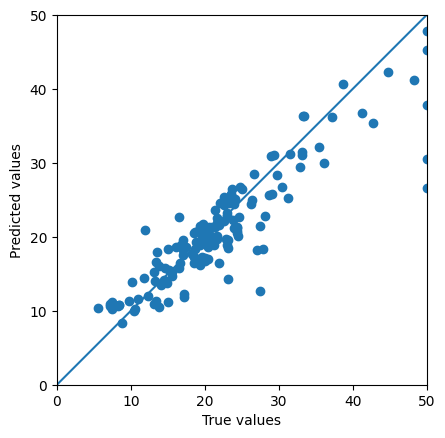

In [ ]:
Y_pred = model.predict(X_test)
a = plt.axes(aspect='equal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0,50])
plt.scatter(y_test,Y_pred)
plt.plot()

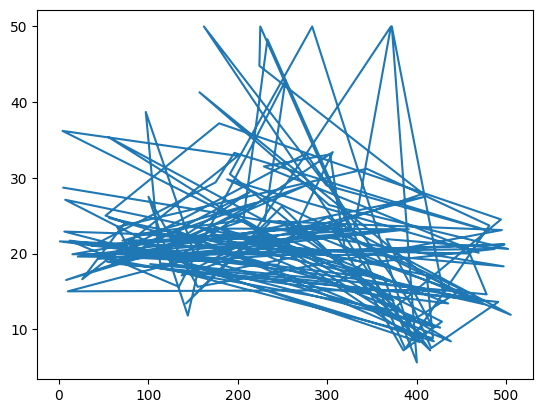

In [ ]:
plt.plot(y_test)


array([[24.290348 ],
       [26.6632   ],
       [23.263062 ],
       [10.598186 ],
       [19.993502 ],
       [19.407452 ],
       [21.30072  ],
       [20.63262  ],
       [18.683859 ],
       [16.516956 ],
       [ 8.417202 ],
       [11.898899 ],
       [13.73765  ],
       [10.208034 ],
       [37.823345 ],
       [30.95471  ],
       [22.831715 ],
       [36.36699  ],
       [31.060326 ],
       [21.368624 ],
       [22.331213 ],
       [20.85854  ],
       [18.686493 ],
       [25.778961 ],
       [21.434414 ],
       [18.477161 ],
       [17.317396 ],
       [16.145197 ],
       [40.733707 ],
       [17.204155 ],
       [15.8408785],
       [16.707296 ],
       [18.778801 ],
       [20.256445 ],
       [25.85511  ],
       [18.966679 ],
       [10.404751 ],
       [30.522282 ],
       [14.136456 ],
       [14.004388 ],
       [24.412306 ],
       [21.223986 ],
       [21.683277 ],
       [16.08496  ],
       [22.751476 ],
       [22.514635 ],
       [18.98123  ],
       [17.48

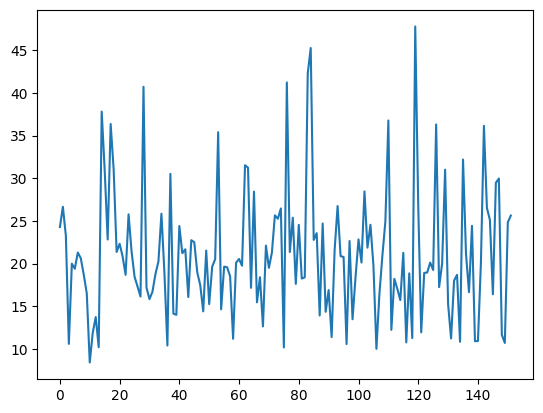

In [ ]:
plt.plot(Y_pred)
Y_pred

In [ ]:
print(Y_pred[:5])
print(y_test[:5])
y_test.head()

[[24.290348]
 [26.6632  ]
 [23.263062]
 [10.598186]
 [19.993502]]
329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
Name: MEDV, dtype: float64


329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
Name: MEDV, dtype: float64